<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Box plot shows MEDV to have a median of around 22 and to also have many outliers which are outside the end of the whisker


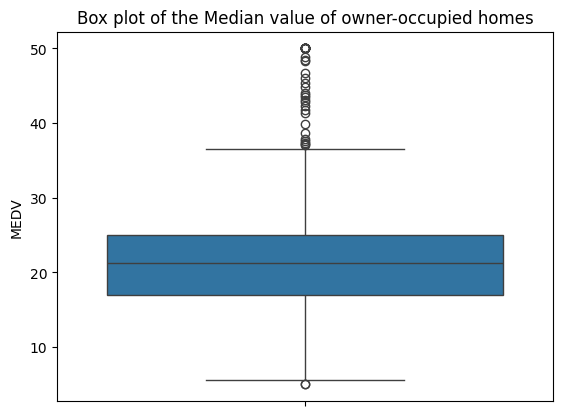

In [7]:
sns.boxplot(boston_df['MEDV'])
pyplot.title("Box plot of the Median value of owner-occupied homes")
print("Box plot shows MEDV to have a median of around 22 and to also have many outliers which are outside the end of the whisker")

As you can see there are many my houses which are not next to the river in this data then there are houses that are next to the river


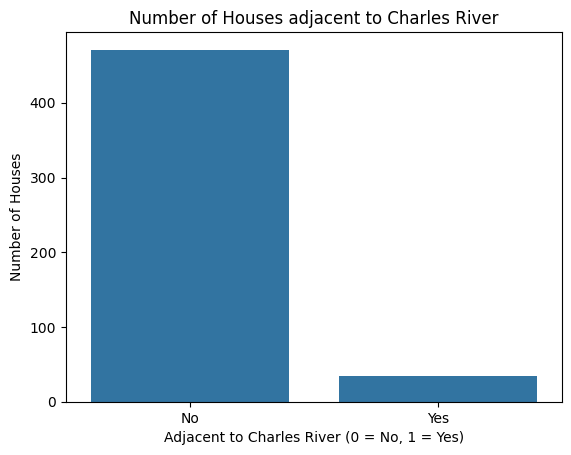

In [11]:
counts = boston_df['CHAS'].value_counts().reset_index()
counts.columns = ['CHAS', 'Count']

sns.barplot(data=counts, x='CHAS', y='Count')
pyplot.xlabel('Adjacent to Charles River (0 = No, 1 = Yes)')
pyplot.ylabel('Number of Houses')
pyplot.title('Number of Houses adjacent to Charles River')
pyplot.xticks([0, 1], ['No', 'Yes'])
print("As you can see there are many my houses which are not next to the river in this data then there are houses that are next to the river")

Text(0.5, 1.0, 'Box Plot of MEDV by Age Group')

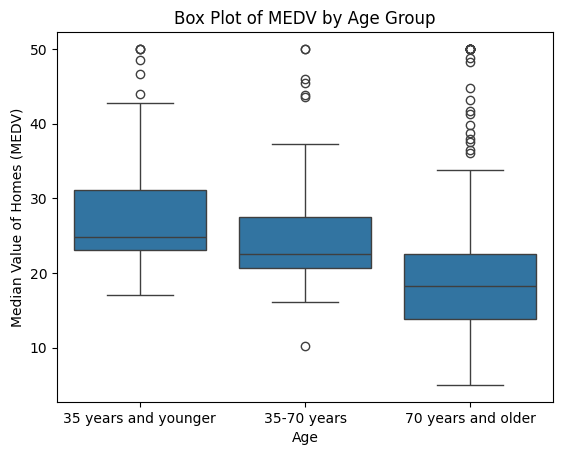

In [15]:
bins = [0, 35, 70, float('inf')]  
labels = ['35 years and younger', '35-70 years', '70 years and older'] 
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)


sns.boxplot(data=boston_df, x='AGE_GROUP', y='MEDV')
pyplot.xlabel('Age')
pyplot.ylabel('Median Value of Homes (MEDV)')
pyplot.title('Box Plot of MEDV by Age Group')
print("As shown by the boxplots, as AGE increases the MEDV decreases. The age group of 70 years and older has the most outliers and is the most spread out data")

Plot shows NOX and INDUS to have a positive relationship where overall as NOX increases, INDUS increases soon. It is of note though that when NOX reaches 0.65, little change occurs in INDUS, maybe indicating a logarithmic relationship as an asymptote at around 20


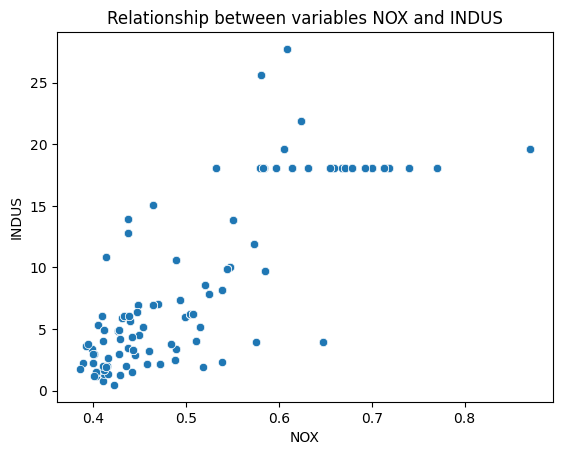

In [18]:
sns.scatterplot(boston_df,x="NOX",y="INDUS")
pyplot.title("Relationship between variables NOX and INDUS")
print("Plot shows NOX and INDUS to have a positive relationship where overall as NOX increases, INDUS increases soon. It is of note though that when NOX reaches 0.65, little change occurs in INDUS, maybe indicating a logarithmic relationship as an asymptote at around 20")

Looks to be a left-skewed histogram: where there is more data for the PTRATIO at the higher end.


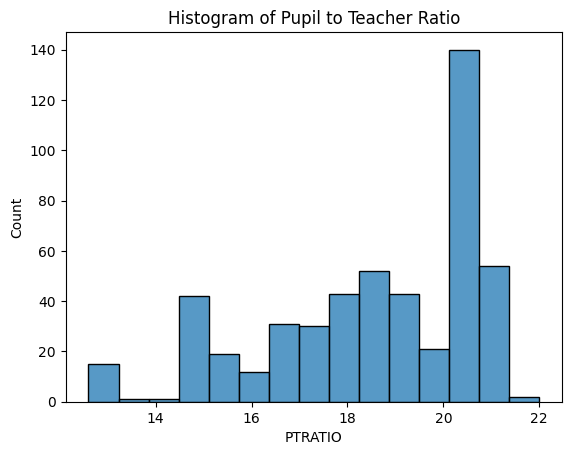

In [21]:
sns.histplot(boston_df['PTRATIO'],bins=15)
pyplot.title('Histogram of Pupil to Teacher Ratio')
print("Looks to be a left-skewed histogram: where there is more data for the PTRATIO at the higher end.")

In [25]:
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']  
medv_no_ = boston_df[boston_df['CHAS'] == 0]['MEDV']  

t_stat, p_value = scipy.stats.ttest_ind(medv_river, medv_no_, equal_var=False) 

print("Null hypothesis:")
print("Alternative hypothesis:")

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

alpha = 0.05 
if p_value < alpha:
    print("There is a significant difference in median values of houses bounded by the Charles River.")
else:
    print("There is no significant difference in median values of houses bounded by the Charles River.")

Null hypothesis:
Alternative hypothesis:
t-statistic: 3.113291312794837
p-value: 0.003567170098137517
There is a significant difference in median values of houses bounded by the Charles River.


In [35]:

grouped_medv = [group['MEDV'].to_numpy() for name, group in boston_df.groupby('AGE_GROUP', observed=True)]

f_stat, p_value = scipy.stats.f_oneway(*grouped_medv)

print("Null hypothesis:The means of each age group are equal")
print("Alternative hypothesis: At least one of these means differ")
print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

alpha = 0.05 
if p_value < alpha:
    print("There is a significant difference in median values of houses across different age groups.")
else:
    print("There is no significant difference in median values of houses across different age groups.")

Null hypothesis:The means of each age group are equal
Alternative hypothesis: At least one of these means differ
f-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15
There is a significant difference in median values of houses across different age groups.


In [36]:
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

print("Null Hypothesis: NOX and INDUS aren't correlated")
print("Alternative Hypothesis: NOX and INDUS are correlated")
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

alpha = 0.05 
if p_value < alpha:
    print("There is a significant relationship between nitric oxide concentrations and proportion of non-retail business acres.")
else:
    print("There is no significant relationship between nitric oxide concentrations and proportion of non-retail business acres.")

Null Hypothesis: NOX and INDUS aren't correlated
Alternative Hypothesis: NOX and INDUS are correlated
Pearson correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98
There is a significant relationship between nitric oxide concentrations and proportion of non-retail business acres.


In [37]:
print("Null Hypothesis:DIS is not correlated to MEDV")
print("Alternative Hypothesis: DIS is correlated to MEDV")

X = boston_df['DIS']  
y = boston_df['MEDV']      

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

print("The p-value < 0.05, you reject the null and conclude that there exists a relationship between DIS and MEDV.")

Null Hypothesis:DIS is not correlated to MEDV
Alternative Hypothesis: DIS is correlated to MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        19:17:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------